## Identifying a linear relationship

Linear models assume that the independent variables, X, take a linear relationship with the
dependent variable, Y. This relationship can be dictated by the following equation:

### Y = m1.X1 + m2.X2 + m3.X3 + ... + c

Here, X specifies the independent variables and m are the coefficients that indicate a unit
change in Y per unit change in X. Failure to meet this assumption may result in poor model
performance.

Linear relationships can be evaluated by scatter plots and residual plots. Scatter plots
output the relationship of the independent variable X and the target Y. Residuals are the
difference between the linear estimation of Y using X and the real target:

If the relationship is linear, the residuals should follow a normal distribution centered at
zero, while the values should vary homogeneously along the values of the independent
variable. here we will evaluate the linear relationship using both scatter and
residual plots in a toy dataset.

In [1]:
# Import the required Python libraries and a linear regression class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

To proceed with this recipe, let's create a toy dataframe with an x variable that
follows a normal distribution and shows a linear relationship with a y variable.

In [2]:
np.random.seed(29)
x = np.random.randn(200)

In [3]:
# Create a y variable that is linearly related to x with some added random noise
y = x * 10 + np.random.randn(200)*2

In [4]:
# create  a dataframe
data = pd.DataFrame([x,y]).T
data.columns = ['X','Y']

In [5]:
data.head()

,X,Y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


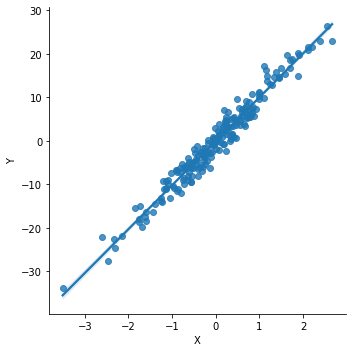

In [6]:
# Plot a scatter plot to visualize the linear relationship:
sns.lmplot(x = 'X',y = 'Y', data=data,order=1)

To evaluate the linear relationship using residual plots, we need to carry out a
few more steps.

In [7]:
# Build a linear regression model between x and y:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(data['X'].to_frame(),data['Y'])

LinearRegression()

**`TIP:`**:Scikit-learn predictor classes do not take pandas Series as arguments.
Because **data['x']** is a pandas Series, we need to convert it into a
dataframe using **to_frame().**

In [8]:
# Make predictions of y using the fitted linear model:
predictions = linreg.predict(data['X'].to_frame())

In [9]:
# Calculate the residuals, that is, the difference between the predictions and the real outcome, y:
residuals = data['Y'] - predictions

Text(0.5, 0, 'Independent variable x')

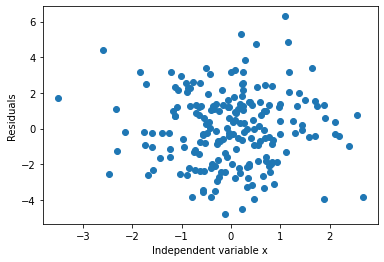

In [10]:
#Make a scatter plot of the independent variable x and the residuals
plt.scatter(y=residuals, x=data['X'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

Text(0.5, 0, 'Residuals')

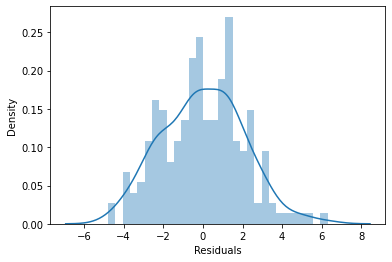

In [11]:
# Finally, let's evaluate the distribution of the residuals
sns.distplot(residuals, bins=30)
plt.xlabel('Residuals')

In the following output, we can see that the residuals are normally distributed and centered
around zero: